# Project Description

Since 2008 guests and hosts have used Airbnb to expand on travelling possibilities and present a unique personalised way of
experiencing the world.Today Airbnb became one of a kind service that is used and recognized by the whole world.Data analysis on millions of listings provided through Airbnb is a crucial factor for the company.These millions of listings generate a lot
of data-data that be analysed and used for security,business decisions,understanding of customers and providers(hosts)
 behaviour and performance of the platform,guiding marketing initiatives,implementation of innovative additional services and much more.
 The dataset has about 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.......




In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df=pd.read_csv(r"C:\Users\riyaz\Downloads\Airbnb NYC 2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df.drop(['id','name','host_id','host_name'],axis=1,inplace=True)

In [7]:
df['reviews_per_month'].fillna((df['reviews_per_month'].mean()), inplace=True)

In [8]:
df.shape

(48895, 12)

In [9]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [11]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
df.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.009115,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.131599,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.091942,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.530093,-0.072376,0.172028
reviews_per_month,-0.009115,0.131599,-0.022373,-0.091942,0.530093,1.000000,-0.006701,0.162980
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.006701,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.162980,0.225701,1.000000


<AxesSubplot:>

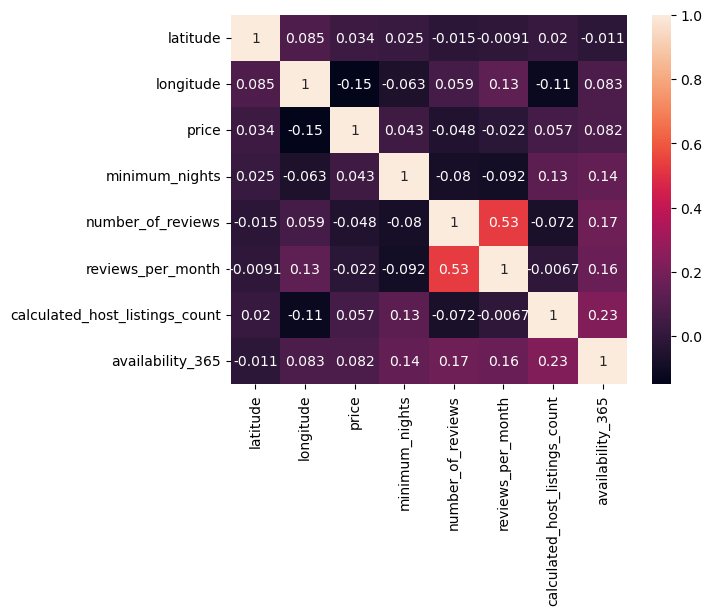

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
#Plotting given spatial data
BBox = (df.longitude.min(),df.longitude.max(),df.latitude.min(), df.latitude.max())    
BBox
        

(-74.24442, -73.71299, 40.49979, 40.91306)

In [14]:
mymap=plt.imread(r"C:\Users\riyaz\Downloads\map.png")

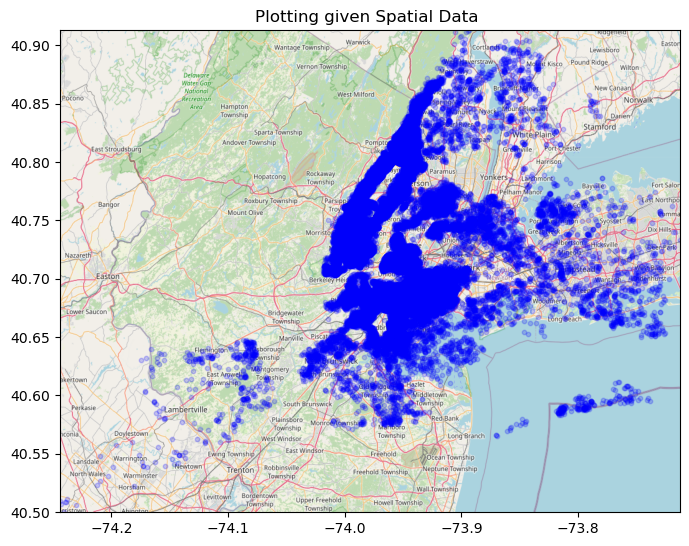

In [20]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting given Spatial Data ')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal')

In [15]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

([<matplotlib.patches.Wedge at 0x157e05c4a30>,
 [Text(-0.06791271159741047, 1.0979015728213013, 'Entire home/apt'),
  Text(-0.014029046165556239, -1.0999105353908039, 'Private room'),
  Text(1.096946139126023, -0.08190951017135857, 'Shared room')])

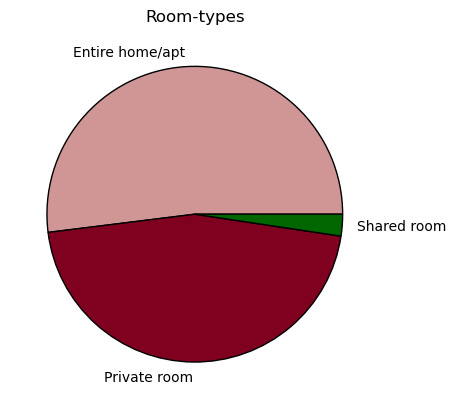

In [16]:
plt.title('Room-types')
slices=[25409,22326,1160]
labels=['Entire home/apt','Private room','Shared room']
colors=['#d09696','#800020','#006600']
plt.pie(slices,labels=labels,colors=colors,wedgeprops={'edgecolor':'black'})

In [17]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

([<matplotlib.patches.Wedge at 0x2745c404c70>,
 [Text(0.19589098201007543, 1.0824170744990715, 'Manhattan'),
  Text(-0.65440050417929, -0.8841719177455769, 'Brooklyn'),
  Text(0.9365212904925617, -0.5769990229230436, 'Queens'),
  Text(1.0923467232360349, -0.1295323752407009, 'Bronx'),
  Text(1.0996841146061016, -0.026359971225222757, 'Staten Island')])

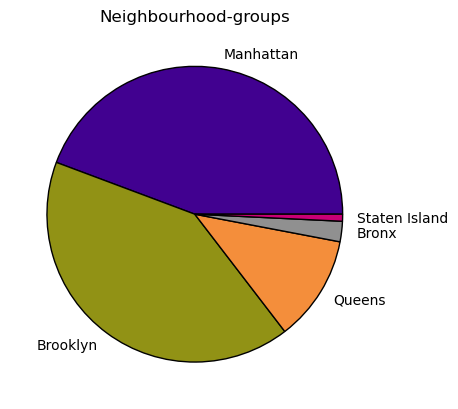

In [24]:
plt.title('Neighbourhood-groups')
slices=[21661, 20104,5666,1091, 373]
labels=['Manhattan','Brooklyn','Queens','Bronx','Staten Island']
colors=['#410190','#919215','#f48e3b','#909090','#c90076']
plt.pie(slices,labels=labels,colors=colors,wedgeprops={'edgecolor':'black'})

In [18]:
#reviews_per_month feature gives the no of bookings done per month
filt=df['neighbourhood_group']=='Manhattan'
Manhattan_book_per_month=df.loc[filt]['reviews_per_month'].sum()

In [19]:
Manhattan_book_per_month

28064.01057075934

In [20]:
neigh_grp=df.groupby('neighbourhood_group')
most_preferred_neighbors=neigh_grp['neighbourhood'].apply(lambda x:x.max())
most_preferred_neighbors

neighbourhood_group
Bronx                   Woodlawn
Brooklyn         Windsor Terrace
Manhattan           West Village
Queens                  Woodside
Staten Island            Woodrow
Name: neighbourhood, dtype: object

In [21]:
#Most preferred room type
filt1=df.groupby(['room_type'])

In [22]:
Preferred_roomtype=filt1['reviews_per_month'].sum()
Preferred_roomtype

room_type
Entire home/apt    33537.185199
Private room       31930.205085
Shared room         1676.271529
Name: reviews_per_month, dtype: float64

In [29]:
#Entire hom/apt  is the most preferred room type

Text(0.5, 1.0, 'Preferred room_types')

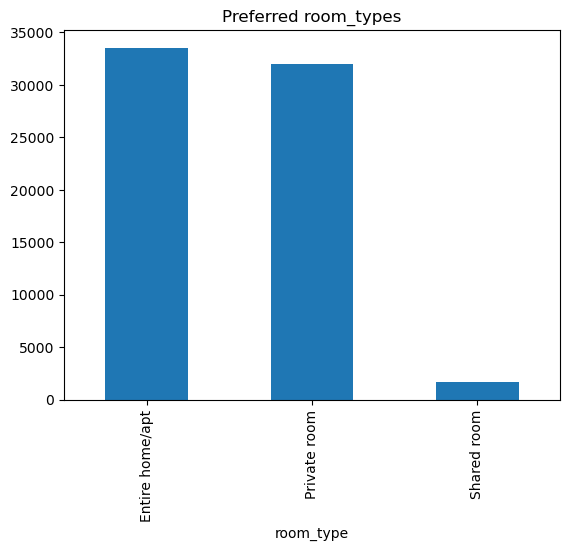

In [23]:
Preferred_roomtype.plot(kind='bar')
plt.title("Preferred room_types")

In [24]:
df['room_type']=df['room_type'].replace({'Entire home/apt':0,'Private room':1,'Shared room':2})

In [34]:
#Top 5 neighborhood with max bookings
neigh_grp1=df.groupby(['neighbourhood_group'])
neigh_grp_max_book=neigh_grp1['number_of_reviews'].nlargest(n=5)


In [25]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0.5, 1.0, 'Neighbourhood_groups')

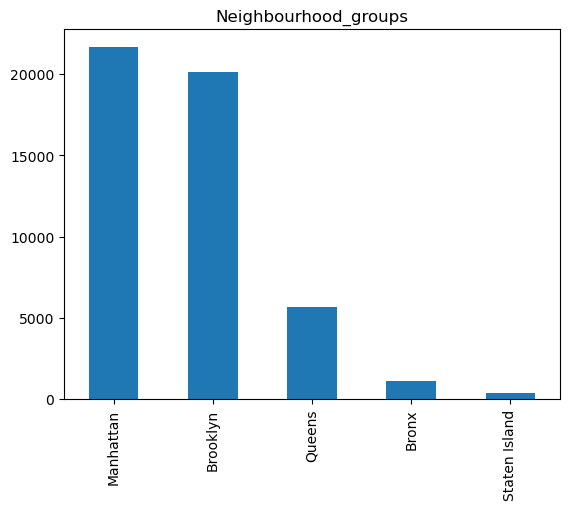

In [36]:
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title('Neighbourhood_groups')

In [26]:
new_df=pd.get_dummies(df,columns=['neighbourhood_group'])

In [38]:
new_df

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,Kensington,40.64749,-73.97237,1,149,1,9,2018-10-19,0.210000,6,365,0,1,0,0,0
1,Midtown,40.75362,-73.98377,0,225,1,45,2019-05-21,0.380000,2,355,0,0,1,0,0
2,Harlem,40.80902,-73.94190,1,150,3,0,NaN,1.373221,1,365,0,0,1,0,0
3,Clinton Hill,40.68514,-73.95976,0,89,1,270,2019-07-05,4.640000,1,194,0,1,0,0,0
4,East Harlem,40.79851,-73.94399,0,80,10,9,2018-11-19,0.100000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Bedford-Stuyvesant,40.67853,-73.94995,1,70,2,0,NaN,1.373221,2,9,0,1,0,0,0
48891,Bushwick,40.70184,-73.93317,1,40,4,0,NaN,1.373221,2,36,0,1,0,0,0
48892,Harlem,40.81475,-73.94867,0,115,10,0,NaN,1.373221,1,27,0,0,1,0,0
48893,Hell's Kitchen,40.75751,-73.99112,2,55,1,0,NaN,1.373221,6,2,0,0,1,0,0


In [27]:
new_df.columns


Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island'],
      dtype='object')

In [28]:
new_df['month'] = pd.DatetimeIndex(new_df['last_review']).month
new_df.drop('last_review',axis=1,inplace=True)

In [29]:
new_df['month']

0        10.0
1         5.0
2         NaN
3         7.0
4        11.0
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: month, Length: 48895, dtype: float64

In [30]:
new_df['month'].isnull().sum()

10052

In [31]:
new_df['month'].fillna((new_df['month'].mean()),inplace=True)

In [32]:
new_df.rename(columns=({'reviews_per_month':'bookings_per_month'}),inplace=True)

In [33]:
x=new_df.drop(['neighbourhood','bookings_per_month'],axis=1)

In [34]:
x.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,month
0,40.64749,-73.97237,1,149,1,9,6,365,0,1,0,0,0,10.000000
1,40.75362,-73.98377,0,225,1,45,2,355,0,0,1,0,0,5.000000
2,40.80902,-73.94190,1,150,3,0,1,365,0,0,1,0,0,6.173571
3,40.68514,-73.95976,0,89,1,270,1,194,0,1,0,0,0,7.000000
4,40.79851,-73.94399,0,80,10,9,1,0,0,0,1,0,0,11.000000


In [35]:
y=new_df['bookings_per_month']

In [59]:
x.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,month
0,40.64749,-73.97237,1,149,1,9,6,365,0,1,0,0,0,10.000000
1,40.75362,-73.98377,0,225,1,45,2,355,0,0,1,0,0,5.000000
2,40.80902,-73.94190,1,150,3,0,1,365,0,0,1,0,0,6.173571
3,40.68514,-73.95976,0,89,1,270,1,194,0,1,0,0,0,7.000000
4,40.79851,-73.94399,0,80,10,9,1,0,0,0,1,0,0,11.000000


In [60]:
#Checking for no multicollinearity using variance inflation factor
vif=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    print(vif)    

2.743820196575393
2.6027003419970702
1.1141740709994072
1.1069922916077066
1.0503844732305037
1.0602659263106788
1.1260790594098133
1.1683093868271364
215821.80073109455
3974780.609249981
4288554.376036991
1119048.6160392133
73925.17356814978
1.0012235021805524


In [61]:
#Some of the features are no multicollinearity while some do but we go ahead with linear regression alogorithm since it passes the liearity test

In [36]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,shuffle=True)

In [37]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
regressor_model=LinearRegression()
regressor_model.fit(X_train,y_train)

LinearRegression()

In [39]:
regressor_model.intercept_

21918786243960.656

In [40]:
regressor_model.coef_

array([-9.21694666e-01,  2.05192244e+00,  1.29174774e-01,  8.72475076e-01,
       -4.93180593e+00,  1.09186195e+01,  4.39331912e-01,  2.38314585e-01,
       -2.19187862e+13, -2.19187862e+13, -2.19187862e+13, -2.19187862e+13,
       -2.19187862e+13,  5.24887161e-02])

In [42]:
y_train_pred=regressor_model.predict(X_train)


In [43]:
y_train_pred

array([0.90625   , 1.19921875, 0.84765625, ..., 0.84765625, 0.83203125,
       1.9296875 ])

In [44]:
residual_train=y_train - y_train_pred

<AxesSubplot:xlabel='bookings_per_month', ylabel='Density'>

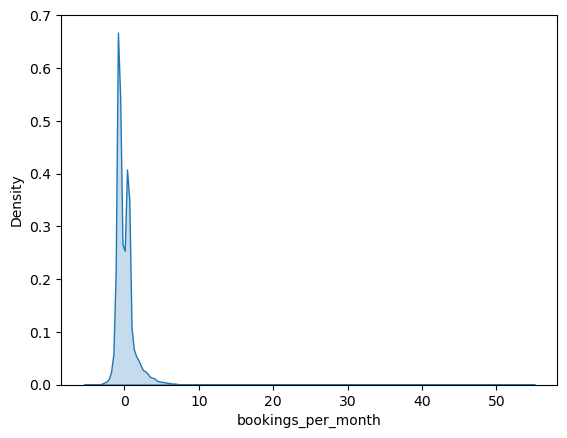

In [48]:
#Checking normality of residuals using kde plot
sns.kdeplot(residual_train,fill=True)

In [ ]:
#From the kde plot its seen that the residual doesnot follow normal distribution.

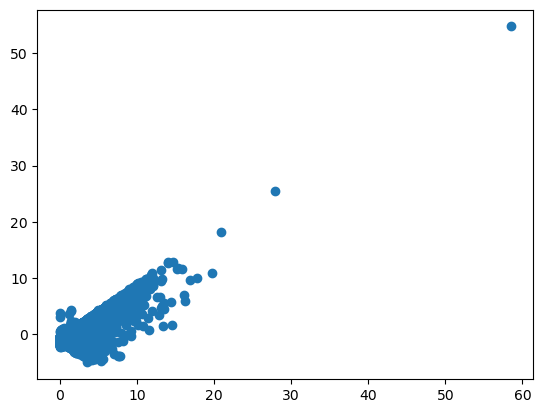

In [63]:
#Checking for homoscedacticity
#Assumptions
#1.mean constan error
#2 constant deviation from zero line
#3.Dependent variable vs residual
plt.scatter(y_train,residual_train)

In [58]:
mse=mean_squared_error(y_train,y_train_pred)

In [59]:
mse


1.5876929184475959

In [60]:
y_test_pred=regressor_model.predict(X_test)
mse_test_error=mean_squared_error(y_test,y_test_pred)
mse_test_error

1.4400695071260867

In [61]:
training_score=r2_score(y_train,y_train_pred)
training_score

0.307351544369897

In [62]:
testing_score=r2_score(y_test,y_test_pred)
testing_score

0.29668425598304626

In [63]:
# Fitting Ridge Regression to the Training set
ridge_regression = Ridge(alpha = 0.5)
ridge_regression.fit(X_train, y_train)

Ridge(alpha=0.5)

In [64]:
y_trai_pred=ridge_regression.predict(X_train)
mse=mean_squared_error(y_train,y_train_pred)
mse

1.5876929184475959

In [65]:
#Training score
train_score=r2_score(y_train,y_train_pred)
train_score

0.307351544369897

In [66]:
#Testinf score
y_tes_pred=ridge_regression.predict(X_test)
testing_score=r2_score(y_test,y_test_pred)
testing_score

0.29668425598304626

In [67]:
# #Implementing k-nearest neighbours and Setup a knn regressor with k neighbors
knn = KNeighborsRegressor()

In [68]:
#GridSearchCV
hyperparameter_grid={'n_neighbors':np.arange(2,30),'p':[1,2]}
gsv_regressor=GridSearchCV(knn,hyperparameter_grid,cv=5)

In [69]:
gsv_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [70]:
#Get best value of model parameter
knn_reg_gsv=gsv_regressor.best_estimator_
knn_reg_gsv.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9, p=1)

In [71]:
#Evaluation after tuning GridSearchCV
#Training
train_r2_gsv=knn_reg_gsv.score(X_train,y_train)
print("R2 score of training data after tuning using GridSearchCV",train_r2_gsv)

#Testing

test_r2_gsv=knn_reg_gsv.score(X_test,y_test)
print("R2 score of testing data after tuning using GridSearchCV",test_r2_gsv)



R2 score of training data after tuning using GridSearchCV 0.6032772746303788
R2 score of testing data after tuning using GridSearchCV 0.4989491243977353


In [68]:
#Implementing RandomForest Regressor
Random_regressor=RandomForestRegressor()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
regressor1 = GridSearchCV(Random_regressor, param_grid = grid_values)



In [69]:
regressor1.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [82]:
random_fores_regressor=regressor1.best_estimator_
random_fores_regressor

RandomForestRegressor(max_depth=7)

In [78]:
random_fores_regressor=regressor1.best_params_

In [79]:
random_fores_regressor

{'max_depth': 7, 'n_estimators': 100}

In [81]:
random_fores_regressor

{'max_depth': 7, 'n_estimators': 100}

In [83]:
random_fores_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=7)

In [84]:
y_train_pred=random_fores_regressor.predict(X_train)

In [85]:
y_train_pred

array([1.21944603, 1.3625755 , 1.3625755 , ..., 1.37322143, 1.37322143,
       1.24855721])

In [86]:
y_test_pred=random_fores_regressor.predict(X_test)

In [87]:
y_test_pred

array([0.33035723, 0.05174668, 2.21199796, ..., 1.3625755 , 2.364649  ,
       2.46166605])

In [89]:
#Evaluation after tuning GridSearchCV
#Training
train_r2_score=random_fores_regressor.score(X_train,y_train)
print("R2 score of training data after tuning using GridSearchCV",train_r2_score)

#Testing

test_r2_score=random_fores_regressor.score(X_test,y_test)
print("R2 score of testing data after tuning using GridSearchCV",test_r2_score)


R2 score of training data after tuning using GridSearchCV 0.6251447446446644
R2 score of testing data after tuning using GridSearchCV 0.593923670458754


In [ ]:
#Summary
# Implementation using Random Forest is giving a good traing and test score.
#Here future booking months can be predicted using the model alogorithms.
#Also the most preferre room type by customers have been found out.
# The most preferred neighbourhood have been found out as well.
#AirBnb can expect good business in the predicted booking months .